In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adarshnagia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adarshnagia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adarshnagia/nltk_data...


True

In [2]:
df = pd.read_csv('/Users/adarshnagia/Downloads/reviews.csv')
df.head()


,Review Text,Sentiment
0,Exceeded my expectations!,positive
1,Very disappointed with the product.,negative
2,Didn't match the description.,negative
3,Fast delivery and great service.,positive
4,Exceeded my expectations!,positive


In [3]:
df.isnull().sum()


Review Text    0
Sentiment      0
dtype: int64

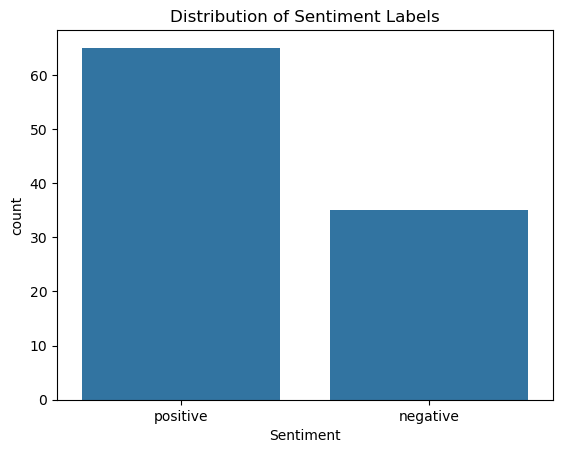

In [4]:
sns.countplot(x='Sentiment', data=df)
plt.title("Distribution of Sentiment Labels")
plt.show()


In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()                          # Lowercase
    text = re.sub(r'\[.*?\]', '', text)          # Remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)           # Remove HTML
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Punctuation
    text = re.sub(r'\n', ' ', text)              # Newlines
    text = re.sub(r'\w*\d\w*', '', text)         # Words with numbers
    tokens = word_tokenize(text)                 # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)




In [11]:
df['Cleaned Review'] = df['Review Text'].apply(clean_text)
df[['Review Text', 'Cleaned Review']].head()


,Review Text,Cleaned Review
0,Exceeded my expectations!,exceeded expectation
1,Very disappointed with the product.,disappointed product
2,Didn't match the description.,didnt match description
3,Fast delivery and great service.,fast delivery great service
4,Exceeded my expectations!,exceeded expectation


In [12]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned Review'])


In [13]:
y = df['Sentiment'].apply(lambda x: 1 if x.lower() == 'positive' else 0)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(X_test)


In [17]:
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       1.00      0.86      0.92         7
    Positive       0.93      1.00      0.96        13

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



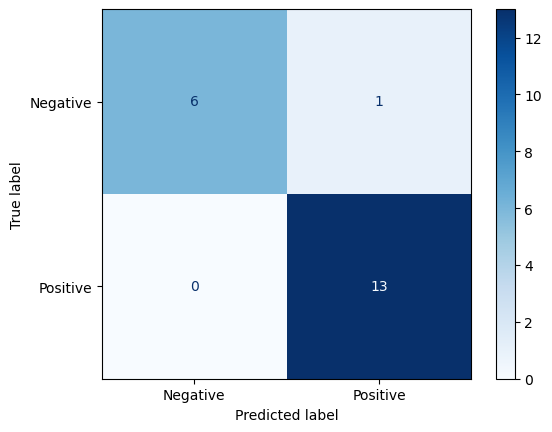

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.show()


In [20]:
test_reviews = df.iloc[y_test.index].copy()
test_reviews['Predicted'] = y_pred
test_reviews[['Review Text', 'Sentiment', 'Predicted']].head()


,Review Text,Sentiment,Predicted
84,Impressive build quality and design.,positive,1
80,Exceeded my expectations!,positive,1
73,Exceeded my expectations!,positive,1
69,Fast delivery and great service.,positive,1
95,"Excellent product, works perfectly!",positive,1


In [21]:
correct = test_reviews[test_reviews['Sentiment'].apply(lambda x: 1 if x.lower() == 'positive' else 0) == test_reviews['Predicted']]
print(correct[['Review Text', 'Sentiment', 'Predicted']].head())


                             Review Text Sentiment  Predicted
84  Impressive build quality and design.  positive          1
80             Exceeded my expectations!  positive          1
73             Exceeded my expectations!  positive          1
69      Fast delivery and great service.  positive          1
95   Excellent product, works perfectly!  positive          1


In [22]:
incorrect = test_reviews[test_reviews['Sentiment'].apply(lambda x: 1 if x.lower() == 'positive' else 0) != test_reviews['Predicted']]
print(incorrect[['Review Text', 'Sentiment', 'Predicted']].head())


                         Review Text Sentiment  Predicted
42  Terrible experience, do not buy.  negative          1
